<a href="https://colab.research.google.com/github/computational-neurology/workshop2025/blob/main/04_fitting_prep_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fitting

### Learning goals
- explain why model fitting is needed
- perform a fitting procedure for a two-node problem
- explain appropriate fitting methods for brain networks

Imagine you have a dataset and you want to simulate the time series. How do you make sure that the parameters are chosen in such a way that they represent the data best? Let's try out the manual way first.

In [4]:
%%capture
import sys
!{sys.executable} -m pip install git+https://github.com/neurolib-dev/neurolib.git
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install nilearn


# @title Run this to install dependencies

In [5]:
# Let's import all the relevant libraries
from neurolib.models.hopf import HopfModel
import numpy as np
import matplotlib.pyplot as plt
from nilearn.connectome import ConnectivityMeasure

<b>Exercise </b><p>

### Fitting different time series

You will be given two sets of time series with 2 regions that we created used two different sets of model parameters. You will be given a list of all the parameters used except for one. You have to recreate these time series by adjusting the model parameters G (the coupling parameter) in Model A and Omega (the instrinsic frequency) in Model B. Your goal is to choose the model parameter of both Model A and B in such a way that the time series that you create look as close as possible to the ones you are provided with. The process to find the parameters that were used to generate artificial data is called parameter recovery.

You will find the time series for Model A as model_a.npy, and so on. Please first find your own solution and write it down and then compare it with the others and write down the adapted solution after the discussion. In A and B, since there are only two nodes, you can guess the best parameter based on how similar your simulated timeseries are to the empirical ones. In C you should try to fit the resulting functional connectivity matrix.

You will be given a range of possible parameters. Try out the best fitting strategy and reflect on how you proceeded. To ensure that the starting point is the same as with the artificial data, please params["seed"] = 42 in your model.

## Model parameters Model A:
### Known parameters:
   
      w:  0.7 * np.pi
      Sigma_ou: 0.1
      Cmat: np.array([[1, 0.02], [0.02, 1]])
      Dmat: 0 for each connection
      Duration: 50ms

### Parameter search for:
            
      G (between 0.5 and 2.5)

## Model parameters Model B:
### Known parameters:

      G: 0.5
      Sigma_ou: 0.1
      Cmat: np.array([[1, 0.02], [0.02, 1]])
      Dmat: 0 for each connection
      Duration: 50ms

### Parameter search for:
      
      Omega (between 0.1 and 1.8)


#### Write down your answer here:
#### Model A:
Group = Schizophrenia

Own solution for G = 2.2

Adapted solution for G after discussion =

#### Model B:
Group = Schizophrenia

Own solution for Omega = 1.8

Adapted solution for Omega after discussion =


### What was your strategy on finding the right parameter?

ANSWER: Trial and error, start at 0.5 and go up in steps of 0.3. Run every step min. 3 times to catch outliers. Looking at the signal synchronization and functional connectivity until they roughly match.


Rate the efficiency and complexity of the strategy:

ANSWER: Very basic and not complex.


If you were to program a strategy, how would it look like?

ANSWER: Our trial and error strategy with more runs and more steps (0.05), most similar match is result.


How would you adapt the strategy if you had more nodes?

ANSWER: Look at FC instead of just the signal graph.
<p>
 -End of exercise-
    </div>

In [ ]:
# @title
# solution to exercise here:
# A
with open('/model_A.npy', 'rb') as f:
  model_A = np.load(f)

  # This is one implementaton of the Hopf model based on Neurolib
  # functional connectivity measure
  correlation_measure = ConnectivityMeasure(kind='correlation')

  # setting parameters
  # Number of brain regions
  N = 2

  # cmat is the structural connectivity matrix (here we start with a fully
  # connected network)
  cmat = np.array([[1, 0.02], [0.02, 1]])

  # dmat is the delay matrix, at the moment we consider instantaneous interactions
  # between brain regions, so no delays
  dmat = np.zeros((N,N)) # no delays

  # We import the model
  model = HopfModel(Cmat=cmat, Dmat=dmat)

  # intrinsic angular frequency of the oscillation (omega)
  model.params['w'] =  0.7 * np.pi

  # set the noise here
  model.params['sigma_ou'] = 0.1

  # set the global coupling parameter G here
  model.params['K_gl'] = 2.2

  # duration of the simulation (in ms)
  model.params['duration'] = 50

  # bifurcation parameter (we will disregard it for now)
  model.params['a'] = 0

  # seed to achieve same starting point as in model_A
  model.params['seed'] = 42

  model.run()

  # Model A plots
  plt.figure(figsize=(4, 4))
  plt.plot(model.t, model_A[0], alpha=0.8)
  plt.plot(model.t, model_A[1], alpha=0.8)
  plt.title("Model A")
  plt.xlabel("t [ms]")
  plt.ylabel("Activity")
  plt.grid(True)
  plt.show()

  figure = plt.figure(figsize=(4, 4))
  plt.title("Model A")
  functional_connectivity = correlation_measure.fit_transform([model_A.T])
  tcf = plt.imshow(np.squeeze(functional_connectivity), cmap=plt.cm.Blues)
  figure.colorbar(tcf)

  # Hopf model plots
  plt.figure(figsize=(4, 4))
  plt.plot(model.t, model.x.T[:,0], alpha=0.8)
  plt.plot(model.t, model.x.T[:,1], alpha=0.8)
  plt.title("Hopf model")
  plt.xlabel("t [ms]")
  plt.ylabel("Activity")
  plt.grid(True)
  plt.show()

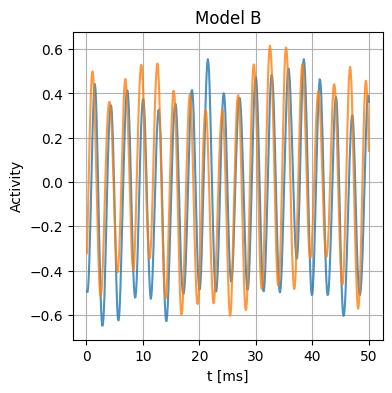

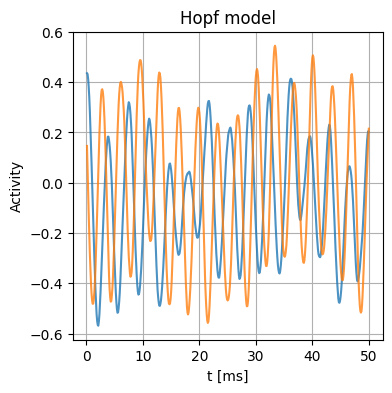

In [90]:
# @title
# solution to exercise here:
# B
with open('/model_A.npy', 'rb') as f:
  model_B = np.load(f)

  # This is one implementaton of the Hopf model based on Neurolib
  # functional connectivity measure
  correlation_measure = ConnectivityMeasure(kind='correlation')

  # setting parameters
  # Number of brain regions
  N = 2

  # cmat is the structural connectivity matrix (here we start with a fully
  # connected network)
  cmat = np.array([[1, 0.02], [0.02, 1]])

  # dmat is the delay matrix, at the moment we consider instantaneous interactions
  # between brain regions, so no delays
  dmat = np.zeros((N,N)) # no delays

  # We import the model
  model = HopfModel(Cmat=cmat, Dmat=dmat)

  # intrinsic angular frequency of the oscillation (omega)
  model.params['w'] =  1.8

  # set the noise here
  model.params['sigma_ou'] = 0.1

  # set the global coupling parameter G here
  model.params['K_gl'] = 0.5

  # duration of the simulation (in ms)
  model.params['duration'] = 50

  # bifurcation parameter (we will disregard it for now)
  model.params['a'] = 0

  # seed to achieve same starting point as in model_A
  model.params['seed'] = 42

  model.run()

  # Model B plots
  plt.figure(figsize=(4, 4))
  plt.plot(model.t, model_B[0], alpha=0.8)
  plt.plot(model.t, model_B[1], alpha=0.8)
  plt.title("Model B")
  plt.xlabel("t [ms]")
  plt.ylabel("Activity")
  plt.grid(True)
  plt.show()

  # Hopf model plots
  plt.figure(figsize=(4, 4))
  plt.plot(model.t, model.x.T[:,0], alpha=0.8)
  plt.plot(model.t, model.x.T[:,1], alpha=0.8)
  plt.title("Hopf model")
  plt.xlabel("t [ms]")
  plt.ylabel("Activity")
  plt.grid(True)
  plt.show()

## Further reading material
### Graph theory
Olaf Sporns. Networks of the Brain. MIT Press, 2010
Marcus Kaiser. A tutorial on connectome analysis, 2011. https://www.dynamic-connectome.org/pubs/Kaiser2011Neuroimage.pdf

### Model fitting
A tutorial on model fitting. https://training.incf.org/lesson/model-fitting-i-intro-lecture